## Main Objective: 
The task is to predict whether a passenger was transported to an alternate dimension during the Spaceship Titanic's collision with the spacetime anomaly.


## Data Understanding
train.csv - Personal records for about two-thirds (~8700) of the passengers, to be used as training data.  
1. PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
2. HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
3. CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
4. Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
5. Destination - The planet the passenger will be debarking to.
6. Age - The age of the passenger.
7. VIP - Whether the passenger has paid for special VIP service during the voyage.
8. RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
9. Name - The first and last names of the passenger.
10. Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

In [13]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv("../dataset/train.csv")

#### What is the extent of missing values across each feature, and are there patterns to the missingness?
Understanding which columns have gaps and whether missingness correlates with other variables (e.g., CryoSleep passengers missing amenity data) will inform imputation strategies.

In [15]:
df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [16]:
df.isnull().mean() * 100

PassengerId     0.000000
HomePlanet      2.312205
CryoSleep       2.496261
Cabin           2.289198
Destination     2.093639
Age             2.059128
VIP             2.335212
RoomService     2.082135
FoodCourt       2.105142
ShoppingMall    2.392730
Spa             2.105142
VRDeck          2.162660
Name            2.300702
Transported     0.000000
dtype: float64

> The percentages help to decide whether imputation or dropping is reasonable (e.g., 2% vs 40%). It seems we should impute the missingness!  
No single column is overwhelmingly missing, so we won’t need to drop entire features. instead, we'll want smart imputation or indicator flags.

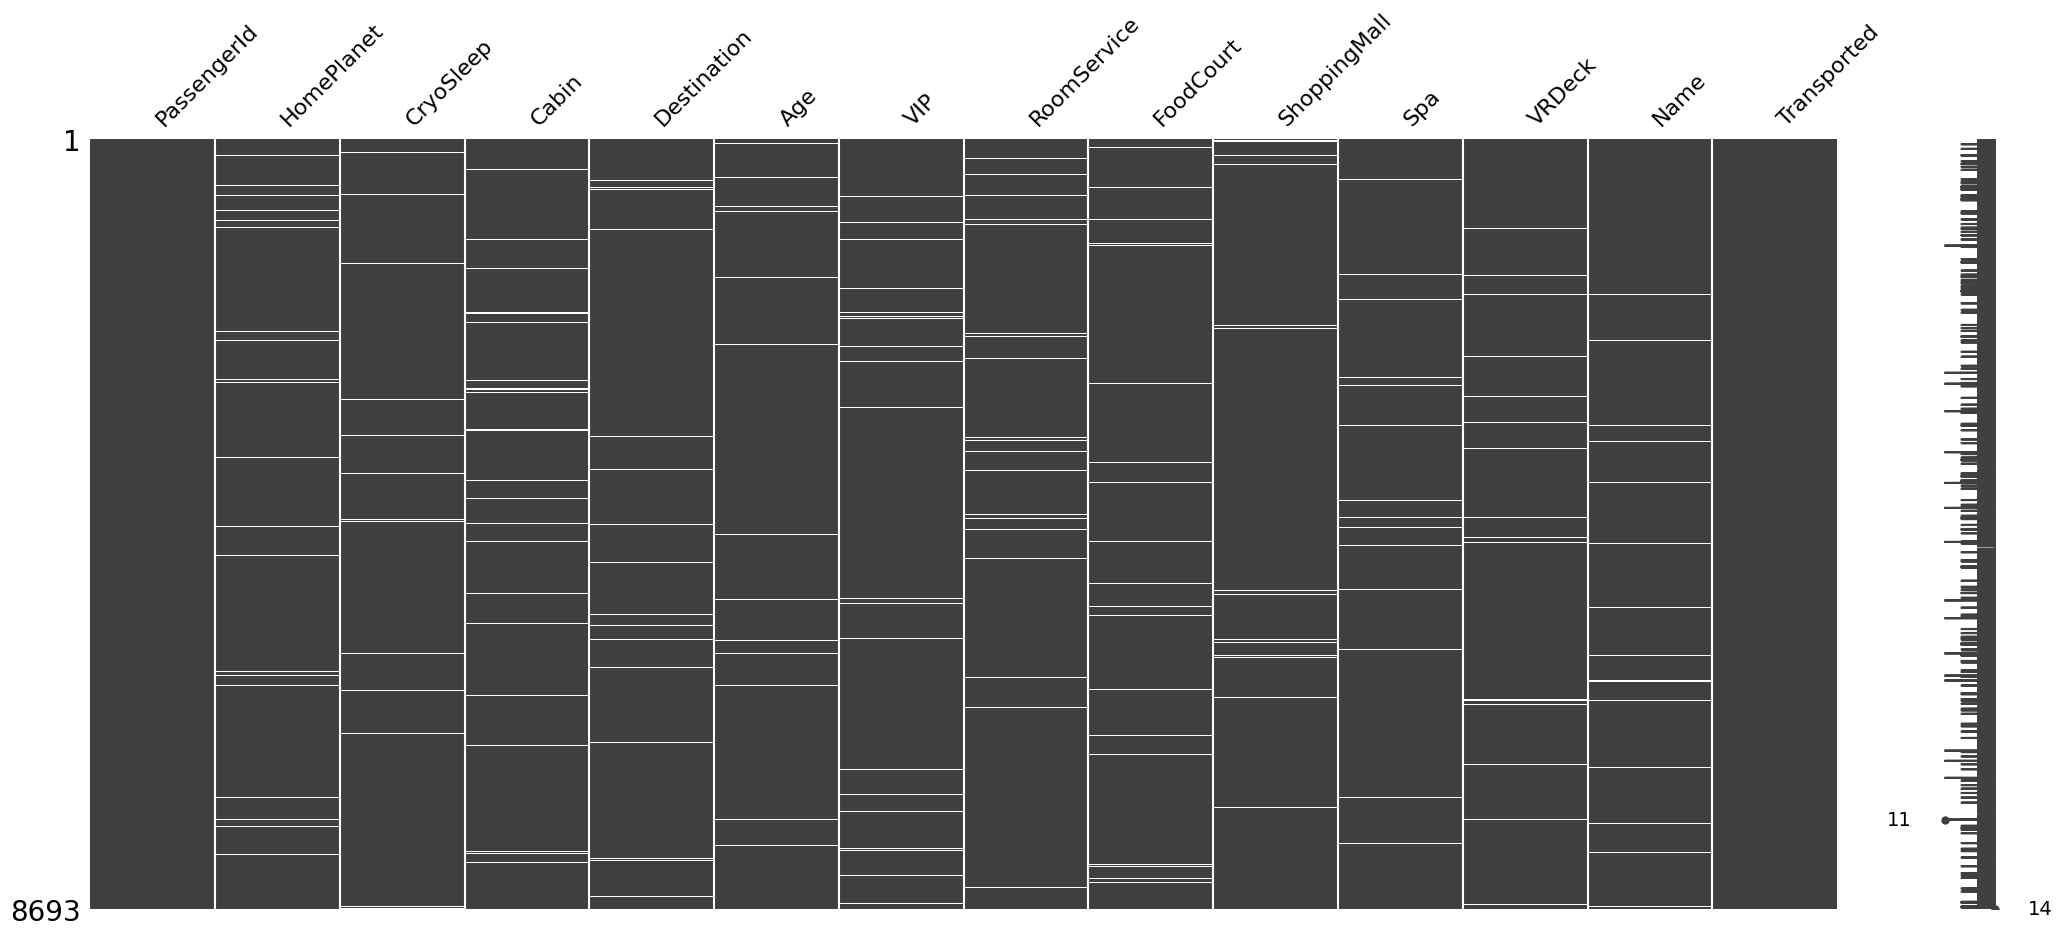

In [17]:
msno.matrix(df)
plt.show()

> If the line is white across several columns, that passenger has missing values in multiple features.   
clusters of horizontal lines close together, that means several passengers in sequence (often from the same group/family, since PassengerId encodes groups) are missing similar sets of features.   
> These patterns are important because they hint at MAR (Missing At Random) rather than MCAR.  

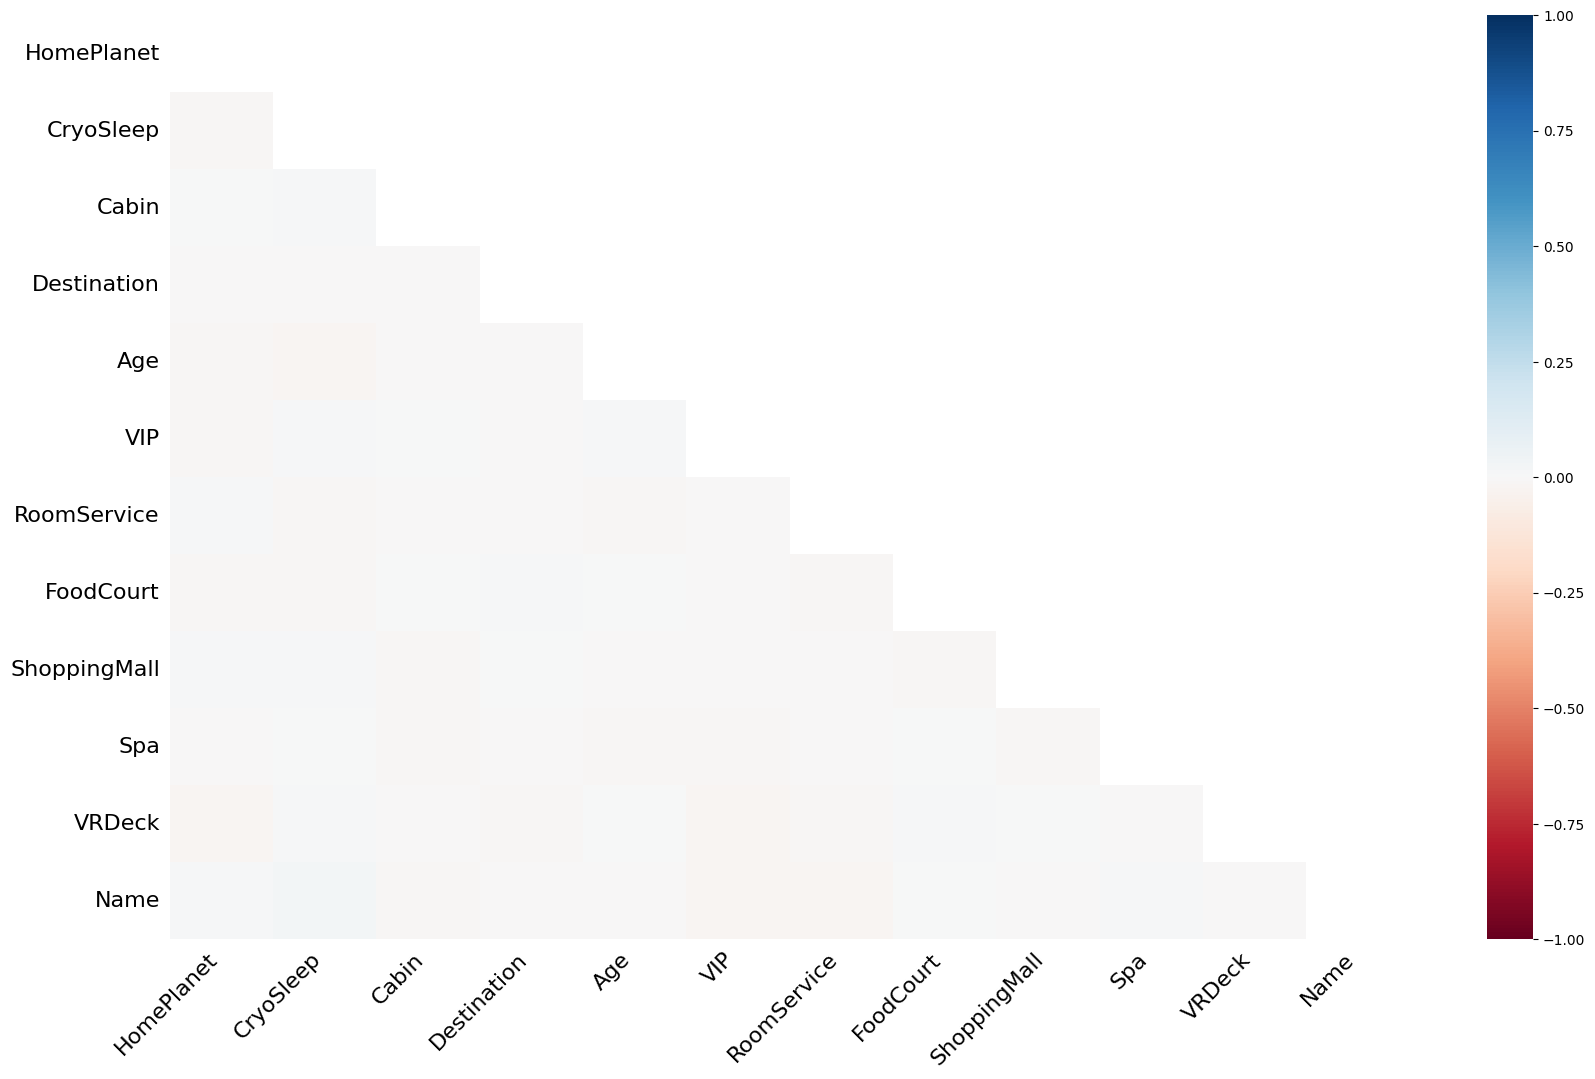

In [ ]:
msno.heatmap(df)
plt.show()

It’s a correlation matrix of missingness. Each cell measures how strongly the missingness of one feature is related to another.  
1. Positive correlation (close to +1): if column A is missing, column B is also often missing.
2. Zero correlation: missingness in A and B are independent.
3. Negative correlation: if A is missing, B is usually present.

HomePlanet, CryoSleep, Cabin, Destination, Age, VIP, These features tend to have missing values together. For example, if Cabin is missing, there’s a higher chance HomePlanet or VIP is missing too. That’s why they cluster positively.  
Other features showing negatives: That means when those features are missing, the “positive cluster” features are usually present.  

1. Structured missingness exists: HomePlanet, CryoSleep, Cabin, Destination, Age, VIP often go missing together.  
2. Independent missingness: Spending features (RoomService, FoodCourt)

#### What are the distributions of numerical features (Age, RoomService, FoodCourt, ShoppingMall, Spa, VRDeck), and are there outliers or skewness that need addressing?
Highly skewed spending data or outliers could affect model performance and suggest transformations.

In [ ]:
df.head(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
